The Museum of Modern Art (MoMA) publishes a data set of all pieces in its collection. The data can be downloaded has a CSV from this link. Note, since the MOMA may update the data set periodically, please download the data from the aforementioned link we provided. You can read more about the data set here.

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

read the dataset

In [3]:
df = pd.read_csv('Artworks.csv')
#read the csv data into pandas dataframe named ccc_df

Load the data and remove all rows that are missing a value for ANY of the following columns: 'Title', 'Artist', or 'DateAcquired'. Use this cleaned data for the rest of the challenge. After removing these rows, how many rows remain?

In [4]:
df.shape
# get the number of rows and columns of the dataset

(138151, 29)

In [5]:
df.isnull().values.any() #Check if there is any null entry in the data

True

In [6]:
df.isnull().sum()  #check for null Values of columns

Title                     39
Artist                  1283
ConstituentID           1283
ArtistBio               5925
Nationality             1283
BeginDate               1283
EndDate                 1283
Gender                  1283
Date                    2202
Medium                  9701
Dimensions              9754
CreditLine              2437
AccessionNumber            0
Classification             0
Department                 0
DateAcquired            7125
Cataloged                  0
ObjectID                   0
URL                    50967
ThumbnailURL           61742
Circumference (cm)    138141
Depth (cm)            124312
Diameter (cm)         136689
Height (cm)            17796
Length (cm)           137409
Weight (kg)           137861
Width (cm)             18717
Seat Height (cm)      138151
Duration (sec.)       136011
dtype: int64

Looking at the Title for each work of art, how many unique titles contain the string 'untitled' (NOT case-sensitive)?

In [7]:
index_title = df[ df['Title'].isnull()].index #Get the index of rows with "Title" column missing values
df.drop(index_title, inplace = True)          #Drop the row with missing titles

index_artist = df[ df['Artist'].isnull()].index #Get the index of rows with "Artist" column missing values
df.drop(index_artist, inplace = True)           #Drop the row with missing artist

index_da = df[ df['DateAcquired'].isnull()].index #Get the index of rows with "DateAcquired" column missing values
df.drop(index_da, inplace = True)           #Drop the row with missing DateAcquired

df.shape # get the number of rows and columns of the dataset after dropping these rows

(129930, 29)

In [8]:
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


Of all pieces listed, what proportion belong to the Photography Department? Remember, you should be using the cleaned data you prepared in the last question.

In [9]:
df['Department'].unique() #Take a look at all the unique values in the column of "Department"

array(['Architecture & Design', 'Drawings & Prints',
       'Painting & Sculpture', 'Photography', 'Media and Performance',
       'Film', 'Fluxus Collection'], dtype=object)

C:\Users\dch31\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='count'>

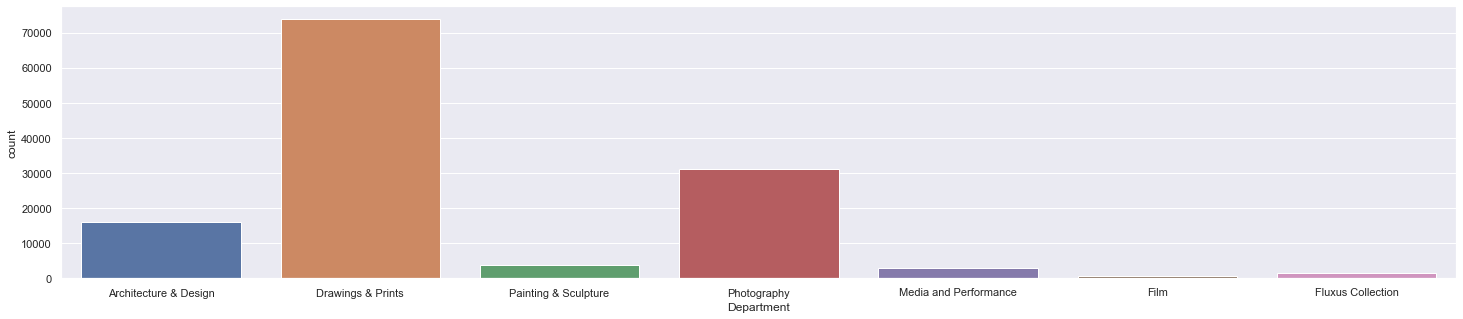

In [10]:
plt.figure(figsize=(25,5))
sns.countplot(df['Department'])

In [11]:
count_photo = df[df['Department'] == 'Photography'].Department.count()  #Get the number of rows with photography department

In [12]:
count_photo/df.shape[0] # get the ratio of photography in all departments

0.23909027938120525

Looking at the Title for each work of art, how many unique titles contain the string 'untitled' (NOT case-sensitive)?

In [13]:
df_untitled = df[df['Title'].str.contains('untitled', regex=False)] # Get a new dataframe with "Title" column contain "untitled" string
df_untitled.shape  # Get the number of rows of the new dataframe


(340, 29)

In [14]:
df_untitled['Title'].nunique()  #Get the number of unique values with Column "Title" containing the string of "untitled"

150

MoMA tends more heavily toward printed works, rather than painted works, as evidenced by the value counts for each Department in the data set. What about the materials on which these prints and paintings appear? Looking at the Medium for each work of art, report the ratio of the number of works that contain the string 'paper' compared to those that contain the string 'canvas' (NOT case-sensitive).

In [15]:
df['Medium'].nunique() #Take a look at all the unique values in the column of "Department"

20551

In [16]:
df_m = df[df['Medium'].notnull()]
number_paper = df_m[df_m['Medium'].str.contains('paper', regex=False)].shape[0]
number_canvas = df_m[df_m['Medium'].str.contains('canvas', regex=False)].shape[0]
number_paper/number_canvas

9.111229377328366

Of the works with a non-null, positive value for Duration (column 'Duration (sec.)'), what proportion of these durations are listed as being longer than 10 hours?

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ObjectID,129930.0,92343.551466,79253.114237,2.000,34290.250000,69978.500000,133995.750000,4.192890e+05
Circumference (cm),10.0,44.868020,28.631604,9.900,23.500000,36.000000,71.125000,8.380000e+01
Depth (cm),11809.0,18.700808,57.735960,0.000,0.000000,1.500000,14.500000,1.808484e+03
Diameter (cm),1398.0,23.371277,45.586004,0.635,7.620004,13.335000,25.082600,9.144000e+02
Height (cm),113496.0,37.488909,50.576578,0.000,17.800000,27.622555,43.600000,9.140000e+03
Length (cm),664.0,85.336845,347.112517,0.000,15.493125,23.956250,60.960122,8.321057e+03
Weight (kg),290.0,1283.674965,12017.504240,0.090,5.726700,20.185100,77.678500,1.850676e+05
Width (cm),112561.0,37.597288,68.596817,0.000,17.300000,25.400000,43.200000,9.144000e+03
Seat Height (cm),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration (sec.),2045.0,6398.851834,140269.590990,0.000,120.000000,475.000000,1665.000000,6.283065e+06


In [18]:
A = df[ df['Duration (sec.)'] > 0].shape[0] #Get the number of rows with postive durations
B = df[ df['Duration (sec.)'] > 36000].shape[0] #Get the number of rows with postive duration longer than 10 hrs (1 hr = 3600s)
B/A # Calculate the ratio by diving B by A

0.013015184381778741

For each year between 1960-1970 (inclusive), compute the number of unique artists whose work MoMA acquired that year. Perform a linear regression on these counts, where X is the year and y is the count of unique artists. Report the R^2 value for this fitted regression model.

In [19]:
df['Date'].nunique()

8765

In [20]:
Year_list = ['1960', '1961','1962','1963','1964','1965','1966','1967','1968','1969','1970']
df_6070 = df[df['Date'].isin(Year_list)]
#df_6070 = df[df['Date'].notnull()]  #Create a new dataframe to drop all the records outside of the year range by first remove null
df_6070.shape


(14608, 29)

In [21]:
df_new = df_6070.groupby(['Date'])['Artist'].nunique()
df_new.head()

Date
1960    321
1961    313
1962    434
1963    387
1964    441
Name: Artist, dtype: int64

In [22]:
df_artist = pd.DataFrame(df_new)
df_artist.reset_index(inplace=True)
df_artist

,Date,Artist
0,1960,321
1,1961,313
2,1962,434
3,1963,387
4,1964,441
5,1965,443
6,1966,463
7,1967,485
8,1968,516
9,1969,407


In [23]:
df_artist['Date'] = pd.to_numeric(df_artist['Date'])
df_artist

,Date,Artist
0,1960,321
1,1961,313
2,1962,434
3,1963,387
4,1964,441
5,1965,443
6,1966,463
7,1967,485
8,1968,516
9,1969,407


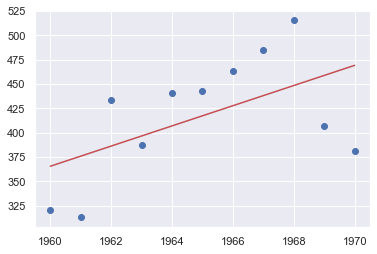

In [24]:
x = df_artist['Date']
y = df_artist['Artist']
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, 'r')


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression(fit_intercept=False)
x = np.array(df_artist['Date'])
y = np.array(df_artist['Artist'])
x = x.reshape(-1, 1)
y = y.reshape(-1,1)
lm.fit(x, y)
r_squared=lm.score(x, y)
print("The R squared value for linear regression model is",r_squared)

The R squared value for linear regression model is 0.011862247234745271


The Golden Ratio (phi ~= 1.618) is popularly regarded for its aesthetic qualities, but how typically is it observed in canvas shapes in MoMA's collection? For all works in the department of Drawings & Prints whose Width (column 'Width (cm)') and Height (column 'Height (cm)') are greater than zero, compute each piece's aspect ratio as Width / Height. What proportion of these aspect ratios are within one percent of the Golden Ratio or the inverse of the Golden Ratio (which would denote a vertical Golden Rectangle)?

In [26]:
df1 = df #copy the dataframe to drop rows with non-postive Width and Height values
df1 = df1[df1['Width (cm)']> 0]# Only keep rows with positive width values
df1 = df1[df1['Height (cm)']> 0]# Only keep rows with positive height values
df1.shape

(110029, 29)

In [27]:
df1['ratio'] = df1['Width (cm)']/df1['Height (cm)']

In [28]:
df1['ratio'].describe()

count    110029.000000
mean          1.121648
std           2.586680
min           0.004464
25%           0.729779
50%           0.857143
75%           1.313889
max         400.000807
Name: ratio, dtype: float64

In [29]:
phi = 1.618
phi_ = 1/phi

count1 = df1[(df1['ratio'] <= phi*1.01) & (df1['ratio'] >= phi*0.99)].ratio.count() 
count2 = df1[(df1['ratio'] <= phi_*1.01) & (df1['ratio'] >= phi_*0.99)].ratio.count()
(count1 + count2)/df1.shape[0]

0.010760799425605977

Does the number of MoMA's yearly acquisitions vary along with changes to the market? Compute the number of pieces acquired by MoMA for each year from 2000-2010 (inclusive), then compute the percent difference in yearly acquisitions. Next, using values from the link provided, obtain January's average closing price for the S&P 500 across those same years (2000-2010). Compute the year-to-year percent difference of those values, as well. Finally, compute and report the Pearson's correlation coefficient between the percent differences in yearly acquisitions and in the average January S&P 500 closing prices.

In [30]:
Year_list2 = ['2000', '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
df_2010 = df[df['Date'].isin(Year_list2)]
df_2010.shape

(8307, 29)

In [31]:
df_new2 = df_2010.groupby(['Date'])['Artist'].nunique()
df_acq = pd.DataFrame(df_new2) #,columns= ['Number of acquisitions']
df_acq.reset_index(inplace=True)
df_acq.rename(columns={"Date": "Year", "Artist": "Number of acquisitions"}, inplace = True)
df_acq

,Year,Number of acquisitions
0,2000,273
1,2001,237
2,2002,285
3,2003,398
4,2004,281
5,2005,190
6,2006,175
7,2007,195
8,2008,197
9,2009,176


In [32]:
acq_change = df_acq['Number of acquisitions'].pct_change()
acq_change

0          NaN
1    -0.131868
2     0.202532
3     0.396491
4    -0.293970
5    -0.323843
6    -0.078947
7     0.114286
8     0.010256
9    -0.106599
10   -0.204545
Name: Number of acquisitions, dtype: float64

In [33]:
acq_change.drop(0, axis =0, inplace = True)
acq_change

1    -0.131868
2     0.202532
3     0.396491
4    -0.293970
5    -0.323843
6    -0.078947
7     0.114286
8     0.010256
9    -0.106599
10   -0.204545
Name: Number of acquisitions, dtype: float64

In [34]:

data = {'Year':['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011'], 
        'S&P price':[1135.63,1140.21,895.84,1132.52,1181.41,1278.73,1424.16,1378.76,865.58,1123.58,1282.62]} 
df_sp500 = pd.DataFrame(data)
df_sp500

,Year,S&P price
0,2001,1135.63
1,2002,1140.21
2,2003,895.84
3,2004,1132.52
4,2005,1181.41
5,2006,1278.73
6,2007,1424.16
7,2008,1378.76
8,2009,865.58
9,2010,1123.58


In [35]:
sp_change = df_sp500['S&P price'].pct_change()
sp_change

0          NaN
1     0.004033
2    -0.214320
3     0.264199
4     0.043169
5     0.082376
6     0.113730
7    -0.031878
8    -0.372204
9     0.298066
10    0.141548
Name: S&P price, dtype: float64

In [36]:
sp_change.drop(0, axis =0, inplace = True)
sp_change

1     0.004033
2    -0.214320
3     0.264199
4     0.043169
5     0.082376
6     0.113730
7    -0.031878
8    -0.372204
9     0.298066
10    0.141548
Name: S&P price, dtype: float64

In [37]:
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(acq_change, sp_change)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.101
